In [1]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

In [78]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)


In [87]:
img_paths = { 
    'Naeon' : 'C:/Users/Lee Jong Ann/Desktop/picture/girl19.jpg',
    'Emma': 'img/emma1.jpg'}

descs = { 
    'Naeon' : None,
    'Emma': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('img/descs.npy', descs)
print(descs)

{'Naeon': array([-0.05847045,  0.10356217,  0.051884  , -0.11553262, -0.13715176,
        0.01084326, -0.07198457, -0.14199673,  0.17852166, -0.1778146 ,
        0.2176124 , -0.12549639, -0.23550633, -0.05545982, -0.08199918,
        0.27303964, -0.16575851, -0.18585521, -0.02153341,  0.03923882,
        0.0513237 , -0.03011214,  0.03124417,  0.07533824, -0.13693301,
       -0.36195534, -0.10005773, -0.00288685, -0.14420772, -0.08798851,
       -0.01539355,  0.0876344 , -0.16021107,  0.0156741 ,  0.03896112,
        0.11974759, -0.01214832, -0.12567706,  0.16076456, -0.01368288,
       -0.31635013,  0.02267548,  0.13342735,  0.24998176,  0.16552508,
       -0.03214918, -0.00839878, -0.13099697,  0.1513707 , -0.15845427,
       -0.0080468 ,  0.1086503 ,  0.10320579,  0.0085147 ,  0.05226428,
       -0.10533847,  0.07006136,  0.13551368, -0.08311666, -0.0487311 ,
        0.08812945, -0.06568349, -0.00321011, -0.10992577,  0.14344965,
        0.07121119, -0.09686842, -0.22429864,  0.09897

In [104]:
img_bgr = cv2.imread('C:/Users/Lee Jong Ann/Desktop/picture/girl19.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

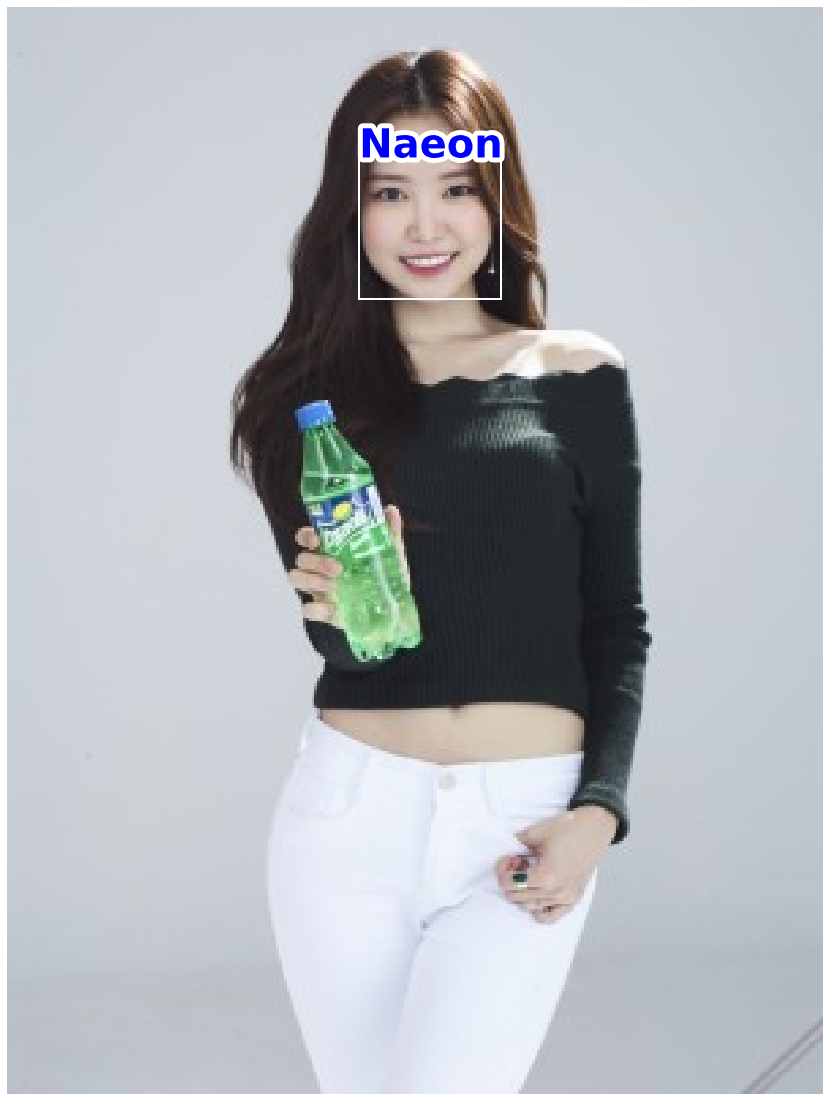

In [105]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6:
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QVBoxLayout,QPushButton,QDesktopWidget,QMainWindow, QAction, qApp
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import Qt
from PyQt5.QtCore import QCoreApplication
from PyQt5.QtGui import QIcon

class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        pixmap = QPixmap('result/output.png')

        lbl_img = QLabel()
        lbl_img.setPixmap(pixmap)
        lbl_size = QLabel('Width: '+str(pixmap.width())+', Height: '+str(pixmap.height()))
        lbl_size.setAlignment(Qt.AlignCenter)

        vbox = QVBoxLayout()
        vbox.addWidget(lbl_img)
        vbox.addWidget(lbl_size)
        self.setLayout(vbox)

        self.setWindowTitle('QPixmap')
        self.move(500, 500)
        self.center()
      
        btn = QPushButton('Quit', self)
        btn.move(250,390)
        btn.resize(btn.sizeHint())
        btn.clicked.connect(QCoreApplication.instance().quit)
        
        
        
        self.setWindowTitle('Quit Button')
        self.setGeometry(300, 300, 300, 200)
        self.show()

    def center(self):
        qr = self.frameGeometry()
        cp = QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())
if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())